In [1]:
import pandas as pd

In [2]:
stock_price_pred=pd.read_csv('Minor Project Data set (Stock Price Prediction).csv',index_col='Date')

In [3]:
stock_price_pred

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [4]:
stock_price_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2+ KB


In [5]:
stock_price_pred.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
stock_price_pred.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

In [8]:
import matplotlib.dates as mdates

In [9]:
import datetime as dt
import numpy

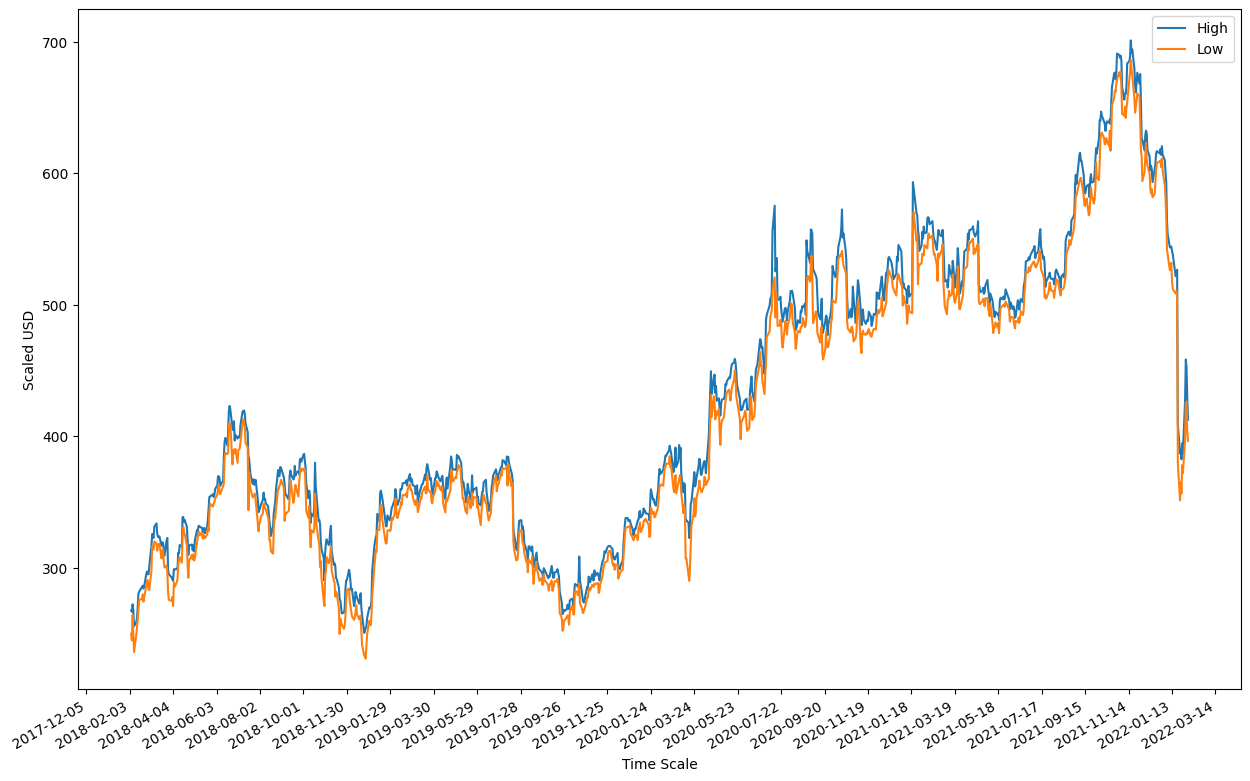

In [10]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca(). xaxis. set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_price_pred.index.values]

plt.plot(x_dates, stock_price_pred['High'], label='High')
plt.plot(x_dates, stock_price_pred['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt. legend()
plt.gcf().autofmt_xdate()
plt.show()

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [12]:
target_y = stock_price_pred['Close']
X_feat = stock_price_pred.iloc[:,0:3]

In [17]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_ft = SC.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,
data=X_ft,
index=X_feat.index)

In [19]:
def lstm_split(data, n_steps):
  x, y = [], []
  for i in range(len(data)-n_steps+1):
    x.append(data[i:i + n_steps, :- 1])
    y.append(data[i + n_steps-1, -1])

  return np.array(x), np.array(y)

In [24]:
X1, y1 = lstm_split(stock_price_pred.values, n_steps=2)

train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_price_pred.index

X_train, X_test = X1[ : split_idx], X1[split_idx: ]
y_train, y_test = y1[:split_idx], y1[split_idx:]
x_train_date, x_test_date = date_index[:split_idx], date_index[split_idx: ]

print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(1008, 2, 5) (807, 2, 5) (201, 2, 5) (201,)


In [28]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm. summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 32)             4864      
                                                                 
 dense (Dense)               (None, 2, 1)              33        
                                                                 
Total params: 4897 (19.13 KB)
Trainable params: 4897 (19.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history=lstm.fit(X_train, y_train,
                epochs=100, batch_size=4,
                verbose=2, shuffle=False)

Epoch 1/100
202/202 - 2s - loss: 96373655470080.0000 - 2s/epoch - 10ms/step
Epoch 2/100
202/202 - 0s - loss: 96099045998592.0000 - 444ms/epoch - 2ms/step
Epoch 3/100
202/202 - 0s - loss: 95080643821568.0000 - 434ms/epoch - 2ms/step
Epoch 4/100
202/202 - 0s - loss: 92929687289856.0000 - 436ms/epoch - 2ms/step
Epoch 5/100
202/202 - 0s - loss: 89321780543488.0000 - 455ms/epoch - 2ms/step
Epoch 6/100
202/202 - 0s - loss: 84472233984000.0000 - 423ms/epoch - 2ms/step
Epoch 7/100
202/202 - 0s - loss: 79233070137344.0000 - 443ms/epoch - 2ms/step
Epoch 8/100
202/202 - 0s - loss: 74469137711104.0000 - 429ms/epoch - 2ms/step
Epoch 9/100
202/202 - 0s - loss: 70769518313472.0000 - 427ms/epoch - 2ms/step
Epoch 10/100
202/202 - 0s - loss: 68272267460608.0000 - 424ms/epoch - 2ms/step
Epoch 11/100
202/202 - 0s - loss: 66761894395904.0000 - 426ms/epoch - 2ms/step
Epoch 12/100
202/202 - 0s - loss: 65909066563584.0000 - 425ms/epoch - 2ms/step
Epoch 13/100
202/202 - 0s - loss: 65440176930816.0000 - 414ms/e

In [31]:
y_pred = lstm.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [33]:
!pip install scikit-learn

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [35]:
print(y_pred.shape)

(201, 2, 1)


In [37]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (201,)
y_pred shape: (201, 2)


In [38]:
!pip install numpy
import numpy as np

In [45]:
if y_pred.ndim == 2:
    # If y_pred has 2 columns, take the first column only
    y_pred = y_pred[:, 0]
else:
    print("y_pred is already a 1D array.")

y_pred is already a 1D array.


In [46]:
# Recalculate the metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the results
print("RSME: ", rmse)
print("MAPE: ", mape)

RSME:  6840709.416058637
MAPE:  0.8860114965389028


In [49]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm. summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 2, 50)             11200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31451 (122.86 KB)
Trainable params: 31451 (122.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: ",rmse)
print("MAPE: ", mape)

RSME:  6840709.416058637
MAPE:  0.8860114965389028


In [60]:
n_steps=10
X1, y1 = lstm_split(stock_price_pred.values, n_steps=n_steps)

train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_price_pred.index

X_train, X_test = X1[: split_idx], X1[split_idx:]
y_train, y_test = y1[: split_idx], y1[split_idx: ]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx :- n_steps]

print(X1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test. shape)

(1000, 10, 5) (800, 10, 5) (200, 10, 5) (199,) (200,)
